
**Getting Started With SQL and BigQuery**🤓

---

Introduction

In [2]:
from google.cloud import bigquery

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/python/Data/pelagic-campus-342705-c439b6f2dd73.json"

We'll work with a dataset of posts on [Hacker News](https://news.ycombinator.com/), a website focusing on computer science and cybersecurity news.

In BigQuery, each dataset is contained in a corresponding project. In this case, our hacker_news dataset is contained in the bigquery-public-data project. To access the dataset,

In [6]:
# Create a "Client" object
client = bigquery.Client()
# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [7]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

comments
full
full_201510
stories


In [8]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

Table Schema

In [9]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('ranking', 'INTEGER', 'NULLABLE', 'Comment ranking', ()),
 SchemaField(

In [10]:
# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"The Googlebot drives REST APIs just fine, and ...",None,icebraining,None,1416248335,2014-11-17 18:18:55+00:00,comment,8619536,8619409,None,None,None
1,None,None,Agreed on there being too many tools. Thankful...,None,mattdesl,None,1420644116,2015-01-07 15:21:56+00:00,comment,8850930,8850783,None,None,None
2,None,None,"&gt; <i>But, rather than seek to persuade thei...",None,laumars,None,1568632444,2019-09-16 11:14:04+00:00,comment,20982919,20982383,None,None,None
3,None,None,That magic wand is allowing doctors to prescri...,None,mnm1,None,1568632405,2019-09-16 11:13:25+00:00,comment,20982918,20981382,None,None,None
4,None,None,I&#x27;d put Google Drive&#x2F;Docs&#x2F;Sheet...,None,ams6110,None,1544056448,2018-12-06 00:34:08+00:00,comment,18614246,18614102,None,None,None


In [11]:
# Preview the first five entries in the "by" column of the "full" table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,title
0,None
1,None
2,None
3,None
4,None


SQL Queries 

 **What are all the U.S. cities in the OpenAQ dataset?**
Now that you've got the basics down, let's work through an example with a real dataset. We'll use an [OpenAQ](https://openaq.org/#/) dataset about air quality.

A. SELECT, FROM, & WHERE

In [12]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

global_air_quality


In [13]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,co,910.00,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
1,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,no2,131.87,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
2,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,o3,15.57,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
3,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,pm25,45.62,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25
4,"BTM Layout, Bengaluru - KSPCB",Bengaluru,IN,so2,4.49,2018-02-22 03:00:00+00:00,µg/m³,CPCB,12.912811,77.60922,0.25


In [14]:
# select all the values from the city column that are in rows where the country column is 'US' (for "United States").

# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

**Submit the query to the dataset**

In [17]:
# Create a "Client" object
client = bigquery.Client()
# Set up the query
query_job = client.query(query)
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()
# What five cities have the most measurements?
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     88
Houston                                     82
Los Angeles-Long Beach-Santa Ana            68
Riverside-San Bernardino-Ontario            60
New York-Northern New Jersey-Long Island    60
Name: city, dtype: int64

In [18]:
query_two_columns = """
                    SELECT city, country
                    FROM `bigquery-public-data.openaq.global_air_quality`
                    WHERE country = 'US'
                    """

query_all_columns = """
                    SELECT *
                    FROM `bigquery-public-data.openaq.global_air_quality`
                    WHERE country = 'US'
                    """

B. GROUP BY, HAVING, & COUNT

**Which Hacker News comments generated the most discussion?**



In [21]:
# Create a "Client" object
client = bigquery.Client()
# Construct a reference to the "hacker_news" dataset
dataset_ref_hacker = client.dataset("hacker_news", project="bigquery-public-data")


# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref_hacker)

# Construct a reference to the "comments" table
table_ref_comments = dataset_ref_hacker.table("comments")

# API request - fetch the table
table_c = client.get_table(table_ref_comments)

# Preview the first five lines of the "comments" table
client.list_rows(table_c, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [22]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

In [23]:
# Set up the query (cancel the query if it would use too much of the quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()

,parent,f0_
0,6427895,46
1,202918,44
2,8120079,148
3,9016949,38
4,7075537,51


Aliasing and other improvements

In [24]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.comments`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_improved, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_df = query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_df.head()

,parent,NumPosts
0,4799163,45
1,726969,51
2,480171,50
3,1326047,63
4,10373608,50


ORDER BY

DATE EXTRACTION

Which day of the week has the most fatal motor accidents?

In [25]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref_acc = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref_acc)

# Construct a reference to the "accident_2015" table
table_ref_acc = dataset_ref_acc.table("accident_2015")

# API request - fetch the table
table_acc = client.get_table(table_ref_acc)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table_acc, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use,land_use_name,functional_system,functional_system_name,ownership,ownership_name,route_signing,route_signing_name,trafficway_identifier,trafficway_identifier_2,milepoint,latitude,longitude,special_jurisdiction,special_jurisdiction_name,first_harmful_event,first_harmful_event_name,manner_of_collision,manner_of_collision_name,relation_to_junction_within_interchange_area,relation_to_junction_specific_location,relation_to_junction_specific_location_name,type_of_intersection,work_zone,relation_to_trafficway,relation_to_trafficway_name,light_condition,light_condition_name,atmospheric_conditions_1,atmospheric_conditions_1_name,atmospheric_conditions_2,atmospheric_conditions_2_name,atmospheric_conditions,atmospheric_conditions_name,school_bus_related,rail_grade_crossing_identifier,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190204,1,1,0,0,0,1,1,109,0,11,9,2015,6,20,20,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-510TH ST,,0,43.499950,-94.035428,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,20,28,20,30,21,2,0,None,0,None,0,None,1,1,2015-09-11 20:20:00+00:00
1,19,Iowa,190233,1,1,0,0,0,1,1,181,0,1,11,2015,1,0,30,1,1,Rural,3,Principal Arterial – Other,1,State Highway Agency,2,U.S. Highway,US-65,,245,41.470728,-93.558444,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,1,Clear,0,No Additional Atmospheric Conditions,1,Clear,No,0000000,88,88,88,88,88,88,0,None,0,None,0,None,1,1,2015-11-01 00:30:00+00:00
2,19,Iowa,190179,1,1,0,0,0,2,2,193,0,4,5,2015,2,16,18,0,1,Rural,5,Major Collector,2,County Highway Agency,4,County Road,CR-K42 DALLAS AVE,CR-300TH ST,0,42.272072,-96.232194,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,3,Intersection Related,Four-Way Intersection,None,4,On Roadside,1,Daylight,2,Rain,0,No Additional Atmospheric Conditions,2,Rain,No,0000000,16,27,16,34,17,1,0,None,0,None,0,None,1,0,2015-05-04 16:18:00+00:00
3,19,Iowa,190248,1,1,0,0,0,4,4,99,0,17,11,2015,3,12,26,1,1,Rural,1,Interstate,1,State Highway Agency,1,Interstate,I-80,,188,41.681933,-92.983681,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,1,Daylight,10,Cloudy,2,Rain,2,Rain,No,0000000,12,25,12,34,99,99,0,None,0,None,0,None,2,0,2015-11-17 12:26:00+00:00
4,19,Iowa,190231,1,1,0,0,0,1,1,121,0,31,10,2015,7,4,49,0,1,Rural,7,Local,2,County Highway Agency,4,County Road,CR-290TH ST,,0,41.228814,-93.970375,0,No Special Jurisdiction (Includes National For...,1,Rollover/Overturn,0,Not Collision with Motor Vehicle in Transport ...,No,1,Non-Junction,Not an Intersection,None,4,On Roadside,2,Dark – Not Lighted,2,Rain,0,N

In [26]:
# Query to find out the number of accidents for each day of the week
query_acc = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

In [27]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query_acc, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame

accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


**AS & WITH**

How many Bitcoin transactions are made per month?

In [28]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref_tr = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref_tr)

# Construct a reference to the "transactions" table
table_ref_tr = dataset_ref_tr.table("transactions")

# API request - fetch the table
table_tr = client.get_table(table_ref_tr)

# Preview the first five lines of the "transactions" table
client.list_rows(table_tr, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000,4000000000,False,0,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000,3000000000,False,0,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000,2900000000,False,0,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000,2800000000,False,0,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000,2500000000,False,0,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


In [29]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


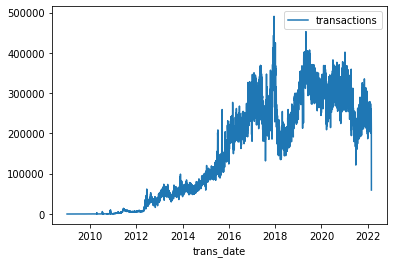

In [30]:
transactions_by_date.set_index('trans_date').plot()

JOIN DATA

How many files are covered by each type of software license?

In [31]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref_git = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref_git)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref_git.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

,repo_name,license
0,aweijnitz/mildly-interesting.info,artistic-2.0
1,MStaehling/Nightmare,artistic-2.0
2,LeMasters/KMPanelKomments,artistic-2.0
3,theist/ssh_or_slack,artistic-2.0
4,Jefferson-Grigsby-Gaming/Prototype-0,artistic-2.0


In [33]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref_git.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


In [34]:
# Query to determine the number of files per license, sorted by number of files
query_join = """
              SELECT L.license, COUNT(1) AS number_of_files
              FROM `bigquery-public-data.github_repos.sample_files` AS sf
              INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
                  ON sf.repo_name = L.repo_name
              GROUP BY L.license
              ORDER BY number_of_files DESC
              """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_join, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()
# Print the DataFrame
file_count_by_license

,license,number_of_files
0,mit,20405612
1,gpl-2.0,16446616
2,apache-2.0,7126915
3,gpl-3.0,4848685
4,bsd-3-clause,3153683
5,agpl-3.0,1320574
6,lgpl-2.1,776741
7,bsd-2-clause,685940
8,lgpl-3.0,567638
9,mpl-2.0,461962
